## Mejores Modelos para Base-Amphibia

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.9192  0.9192    0.9192  0.9825
1              XGBoost     0.9519  0.9035    0.9271  0.9850
2  Logistic Regression     0.4467  0.6610    0.5331  0.7650
3                  SVM     0.9288  0.9179    0.9233  0.9839


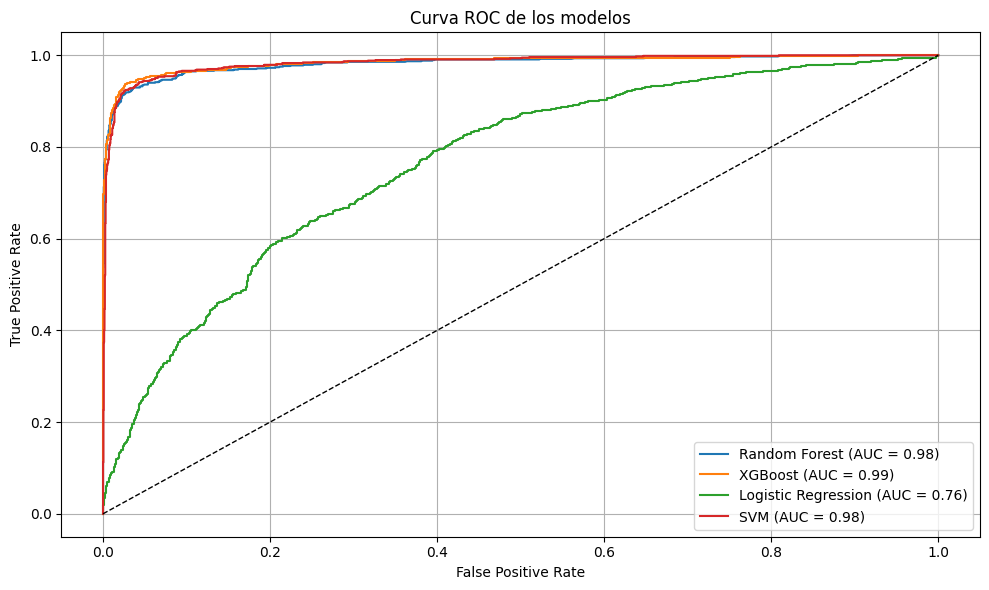

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_amphibia_B.csv')

df_final['is_amphibia'] = df_final['is_amphibia'].astype(bool).astype(int)
X = df_final.drop(columns=['is_amphibia'])
y = df_final['is_amphibia']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=250,
        max_depth=45,
        min_samples_leaf=1,
        min_samples_split=3,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.65545477574336,               
        reg_lambda=0.01710752583508911,   
        max_depth=45,
        learning_rate=0.1396072570318289,
        n_estimators=200,
        subsample=0.9407152317322499,
        colsample_bytree=0.5506971813188721,
        gamma=0.0032954901434081862,
        min_child_weight=2,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l2',          
        C=0.10823477015632059,                  
        solver='saga', 
        max_iter=1000,
        class_weight=None,
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=64.51016215887462,                
        probability=True,
        random_state=42,
        gamma='scale',
        class_weight='balanced',
        tol=0.0003444959484047754
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mejores Modelos para M1-Amphibia

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.8633  0.8805    0.8718  0.9746
1              XGBoost     0.9245  0.8706    0.8967  0.9802
2  Logistic Regression     0.4288  0.6600    0.5199  0.7415
3                  SVM     0.8990  0.8990    0.8990  0.9768


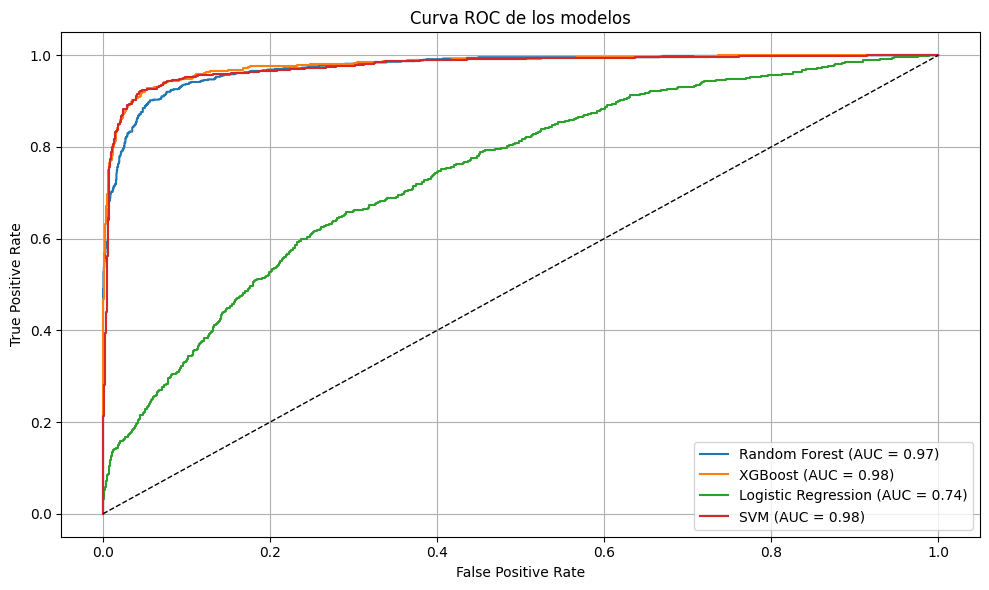

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_amphibia_M1.csv')

df_final['is_amphibia'] = df_final['is_amphibia'].astype(bool).astype(int)
X = df_final.drop(columns=['is_amphibia'])
y = df_final['is_amphibia']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=150,
        max_depth=30,
        min_samples_leaf=2,
        min_samples_split=2,
        max_features=0.5,
        class_weight=None,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.00017989459935439193,              
        reg_lambda=7.023146013996321e-06,       
        max_depth=20,
        learning_rate=0.09193154099636675,
        n_estimators=250,
        subsample=0.6663510033310861,
        colsample_bytree=0.9301570541241507,
        gamma=0.04214295917371541,
        min_child_weight=1,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='elasticnet',             
        C=0.021107379505439103,                      
        solver='saga', 
        max_iter=1000,
        l1_ratio=0.3041842575723162,
        class_weight='balanced',
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=22.90635387691067,                 
        probability=True,
        random_state=42,
        gamma='scale',
        class_weight='balanced',
        tol=0.0003015982524302235
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mejores Modelos para M2-Amphibia

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.8887  0.8932    0.8909  0.9822
1              XGBoost     0.9203  0.8865    0.9031  0.9858
2  Logistic Regression     0.4347  0.6561    0.5230  0.7520
3                  SVM     0.9286  0.9115    0.9200  0.9838


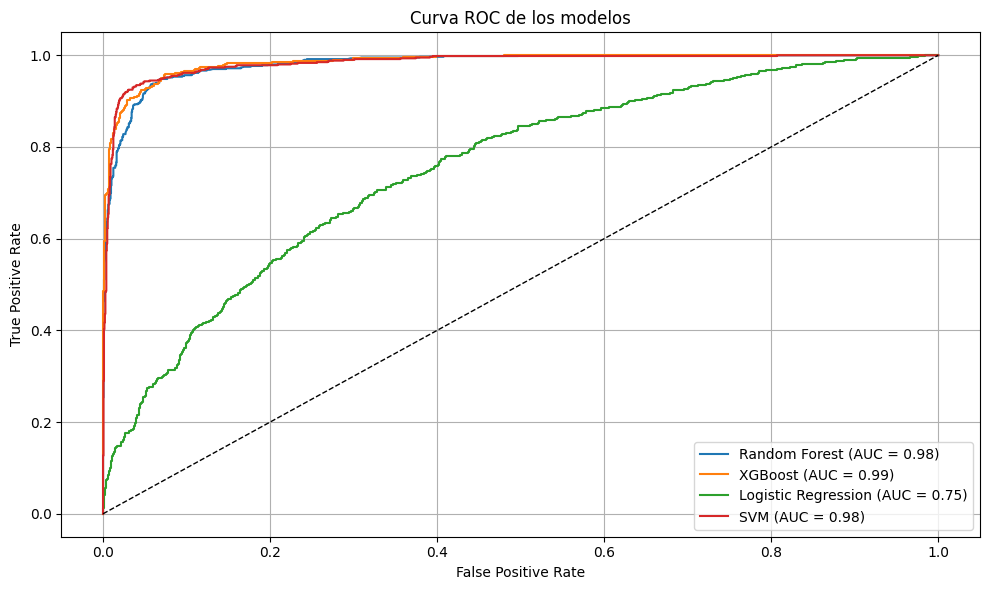

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_amphibia_M2.csv')

df_final['is_amphibia'] = df_final['is_amphibia'].astype(bool).astype(int)
X = df_final.drop(columns=['is_amphibia'])
y = df_final['is_amphibia']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=250,
        max_depth=25,
        min_samples_leaf=1,
        min_samples_split=2,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=1.0220713597350852e-08,             
        reg_lambda=0.04867175877489809,            
        max_depth=45,
        learning_rate=0.13844874508172178,
        n_estimators=200,
        subsample=0.9718232725684344,
        colsample_bytree=0.8070099766726937,
        gamma=0.08437157606656463,
        min_child_weight=9,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l1',            
        C=0.9902924345181946,                  
        solver='saga', 
        max_iter=1000,
        class_weight=None,
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=135.36567698006465,               
        probability=True,
        random_state=42,
        gamma='auto',
        class_weight='balanced',
        tol=0.0018857723251714126
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()